In [6]:
import pandas as pd

# Specify the path to your CSV file
csv_path = '/content/drive/MyDrive/DataSetA.csv'

# Load the CSV file into a Pandas DataFrame
df = pd.read_csv(csv_path, on_bad_lines='skip')  # Skips bad rows


df


,Lassi,Coffee Powder,Butter,Yougurt,Ghee,Cheese,Unnamed: 6
0,Ghee,Coffee Powder,NaN,NaN,NaN,NaN,NaN
1,Lassi,Tea Powder,Butter,Cheese,NaN,NaN,NaN
2,Cheese,Tea Powder,Panner,Coffee Powder,Butter,Bread,NaN
3,Cheese,Yougurt,Coffee Powder,Sugar,Butter,Sweet,NaN
4,Sugar,Tea Powder,Ghee,Sweet,Panner,Milk,NaN
...,...,...,...,...,...,...,...
8726,Panner,Sugar,Bread,Milk,Cheese,NaN,NaN
8727,Sugar,Bread,Coffee Powder,Cheese,NaN,NaN,NaN
8728,Bread,Cheese,Yougurt,Milk,NaN,NaN,NaN
8729,Ghee,Bread,Yougurt,Sugar,Cheese,NaN,NaN


# removing unnecceesary colomn

In [21]:


# Remove unnecessary columns and handle NaN
df = df.drop(columns=['Unnamed: 6'], errors='ignore').fillna('')

# Check the dataset after cleaning
print(df.head())


    Lassi  Coffee Powder         Butter        Yougurt    Ghee Cheese
0    Ghee  Coffee Powder                                             
1   Lassi     Tea Powder         Butter         Cheese               
2  Cheese     Tea Powder         Panner  Coffee Powder  Butter  Bread
3  Cheese        Yougurt  Coffee Powder          Sugar  Butter  Sweet
4   Sugar     Tea Powder           Ghee          Sweet  Panner   Milk


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Transforming it into a list of transactions

In [22]:


# Remove NaN values row-wise
df_cleaned = df.apply(lambda row: row.dropna().tolist(), axis=1)

# Convert to list of transactions
transactions = df_cleaned.tolist()

# Verify the cleaned transactions
print(transactions[:5])


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['Ghee', 'Coffee Powder', '', '', '', ''], ['Lassi', 'Tea Powder', 'Butter', 'Cheese', '', ''], ['Cheese', 'Tea Powder', 'Panner', 'Coffee Powder', 'Butter', 'Bread'], ['Cheese', 'Yougurt', 'Coffee Powder', 'Sugar', 'Butter', 'Sweet'], ['Sugar', 'Tea Powder', 'Ghee', 'Sweet', 'Panner', 'Milk']]


In [23]:
cleaned_transactions = [list(filter(None, transaction)) for transaction in transactions]

# Display the cleaned transactions
print(cleaned_transactions)

[['Ghee', 'Coffee Powder'], ['Lassi', 'Tea Powder', 'Butter', 'Cheese'], ['Cheese', 'Tea Powder', 'Panner', 'Coffee Powder', 'Butter', 'Bread'], ['Cheese', 'Yougurt', 'Coffee Powder', 'Sugar', 'Butter', 'Sweet'], ['Sugar', 'Tea Powder', 'Ghee', 'Sweet', 'Panner', 'Milk'], ['Sweet', 'Coffee Powder'], ['Butter', 'Ghee', 'Panner'], ['Sweet', 'Tea Powder', 'Butter', 'Yougurt', 'Sugar', 'Cheese'], ['Panner', 'Ghee'], ['Milk', 'Panner', 'Tea Powder', 'Sweet', 'Bread'], ['Butter', 'Coffee Powder', 'Panner', 'Sweet', 'Ghee', 'Lassi'], ['Milk', 'Sweet', 'Butter', 'Sugar', 'Lassi', 'Panner'], ['Bread', 'Coffee Powder', 'Tea Powder'], ['Butter', 'Ghee', 'Milk', 'Cheese'], ['Bread', 'Coffee Powder'], ['Cheese', 'Tea Powder', 'Sweet', 'Lassi', 'Coffee Powder', 'Sugar'], ['Coffee Powder', 'Cheese', 'Tea Powder', 'Yougurt', 'Sugar'], ['Lassi', 'Ghee', 'Cheese', 'Sweet', 'Coffee Powder', 'Bread'], ['Coffee Powder', 'Panner', 'Butter', 'Ghee', 'Tea Powder', 'Yougurt'], ['Yougurt', 'Sweet', 'Milk', 'But

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [17]:
transactions=cleaned_transactions

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Converting into One Hot Encoded Dataframe

In [24]:
from mlxtend.preprocessing import TransactionEncoder

# Encode transactions
te = TransactionEncoder()
te_ary = te.fit(cleaned_transactions).transform(cleaned_transactions)

# Create a DataFrame with one-hot encoding
df_trans = pd.DataFrame(te_ary, columns=te.columns_)

# Preview encoded transactions
print(df_trans.head())


   Bread  Butter  Cheese  Coffee Powder   Ghee  Lassi   Milk  Panner  Sugar  \
0  False   False   False           True   True  False  False   False  False   
1  False    True    True          False  False   True  False   False  False   
2   True    True    True           True  False  False  False    True  False   
3  False    True    True           True  False  False  False   False   True   
4  False   False   False          False   True  False   True    True   True   

   Sweet  Tea Powder  Yougurt  
0  False       False    False  
1  False        True    False  
2  False        True    False  
3   True       False     True  
4   True        True    False  


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Applying FP Growth Algorithm

In [30]:
from mlxtend.frequent_patterns import fpgrowth

# Find frequent itemsets with minimum support of 1%
frequent_itemsets = fpgrowth(df_trans, min_support=0.1, use_colnames=True)

# Preview frequent itemsets
print(frequent_itemsets.head())


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


    support         itemsets
0  0.356431           (Ghee)
1  0.353224  (Coffee Powder)
2  0.356660         (Cheese)
3  0.349330         (Butter)
4  0.343718     (Tea Powder)


In [31]:
# Filter itemsets with more than one item
frequent_itemsets_filtered = frequent_itemsets[frequent_itemsets['itemsets'].apply(len) > 1]
print(frequent_itemsets_filtered)


     support                  itemsets
12  0.120948            (Cheese, Ghee)
13  0.125873     (Coffee Powder, Ghee)
14  0.122895   (Coffee Powder, Cheese)
15  0.122208  (Coffee Powder, Yougurt)
16  0.119574     (Coffee Powder, Milk)
..       ...                       ...
73  0.120605             (Milk, Sugar)
74  0.120261             (Ghee, Sugar)
75  0.113962            (Sugar, Bread)
76  0.119688              (Ghee, Milk)
77  0.117054            (Cheese, Milk)

[66 rows x 2 columns]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Extracting Association Rules

In [35]:
from mlxtend.frequent_patterns import association_rules

# Generate rules with confidence threshold
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.1,num_itemsets=1)
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])


         antecedents      consequents   support  confidence      lift
0           (Cheese)           (Ghee)  0.120948    0.339114  0.951414
1             (Ghee)         (Cheese)  0.120948    0.339332  0.951414
2    (Coffee Powder)           (Ghee)  0.125873    0.356355  0.999788
3             (Ghee)  (Coffee Powder)  0.125873    0.353149  0.999788
4    (Coffee Powder)         (Cheese)  0.122895    0.347925  0.975508
..               ...              ...       ...         ...       ...
127          (Bread)          (Sugar)  0.113962    0.326123  0.936021
128           (Ghee)           (Milk)  0.119688    0.335797  0.943929
129           (Milk)           (Ghee)  0.119688    0.336446  0.943929
130         (Cheese)           (Milk)  0.117054    0.328195  0.922560
131           (Milk)         (Cheese)  0.117054    0.329041  0.922560

[132 rows x 5 columns]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


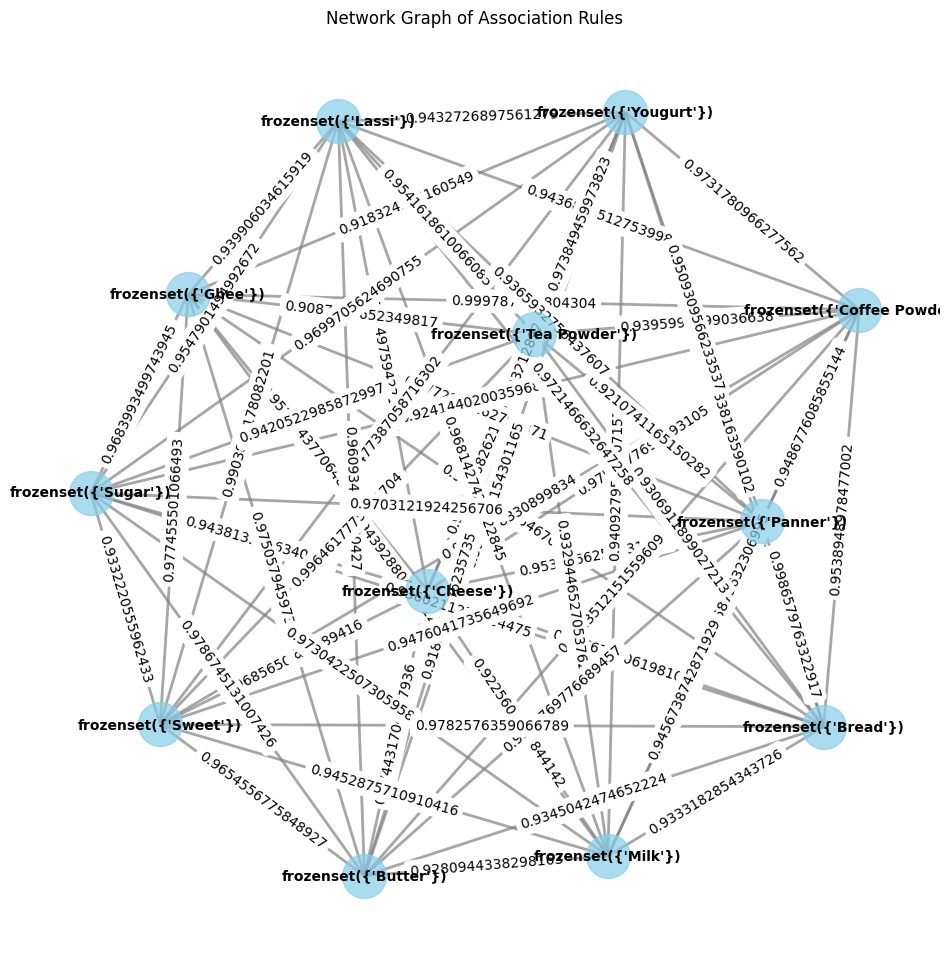

In [37]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a new graph
G = nx.Graph()

# Iterate over each rule and add edges between the antecedents and consequents
for _, rule in rules.iterrows():
    antecedent = str(rule['antecedents'])
    consequent = str(rule['consequents'])

    # Add edges to the graph
    G.add_edge(antecedent, consequent, weight=rule['lift'])

# Set up the plot
plt.figure(figsize=(12, 12))

# Draw the network graph
pos = nx.spring_layout(G, k=0.3, iterations=50)  # Layout for the nodes
nx.draw_networkx_nodes(G, pos, node_size=1000, node_color='skyblue', alpha=0.7)
nx.draw_networkx_edges(G, pos, width=2, alpha=0.7, edge_color='gray')
nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold')

# Add edge labels for lift (optional)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)

# Display the plot
plt.title("Network Graph of Association Rules")
plt.axis('off')  # Hide axis
plt.show()
